In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [18]:
import plaidml.keras
plaidml.keras.install_backend()

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Check data ##

In [7]:
train_images[1].shape

(28, 28)

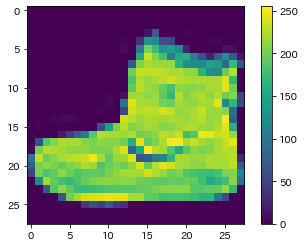

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

## pre process ##

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## make layor ##

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2815 - acc: 0.8952
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2687 - acc: 0.8998
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2577 - acc: 0.9044
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2471 - acc: 0.9082
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2386 - acc: 0.9109


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3434 - acc: 0.8823
Test accuracy: 0.8823


In [21]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([2.2738528e-10, 4.8930920e-12, 1.4448861e-13, 2.5049378e-14,
       1.6135414e-10, 1.2694224e-03, 6.0184857e-10, 4.1906983e-03,
       2.0360313e-09, 9.9453992e-01], dtype=float32)